# Perceptron in Deep Learning

## Aim
To implement and understand the Perceptron learning algorithm for binary classification.

## Theory
A perceptron is a simple linear classifier that computes a weighted sum of inputs and applies a step activation function.

Weight update rule:
w = w + lr(y_true − y_pred)x
b = b + lr(y_true − y_pred)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
X = np.array([
    [2, 3],
    [1, 1],
    [2, 1],
    [-1, -2],
    [-2, -1],
    [-3, -2]
])

y = np.array([1, 1, 1, 0, 0, 0])
X, y

(array([[ 2,  3],
        [ 1,  1],
        [ 2,  1],
        [-1, -2],
        [-2, -1],
        [-3, -2]]),
 array([1, 1, 1, 0, 0, 0]))

## Perceptron Implementation

In [8]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs
        '''
        This is the constructor method. It initializes the perceptron with two hyperparameters:
                 - lr (learning rate): Controls how much the weights are adjusted during each update. A smaller learning rate means smaller steps.
                 - epochs: The number of times the entire training dataset will be passed through the perceptron.
        '''
    def activation(self, z):
        return np.where(z >= 0, 1, 0)
        '''
        activation(self, z): This method implements the step activation function. It takes a weighted sum z as input:

               - If z is greater than or equal to 0, it returns 1.
               - Otherwise, it returns 0. This means it classifies inputs into one of two categories.
        '''

    def fit(self, X, y):  # This is the training method where the perceptron learns from the data:
        self.w = np.zeros(X.shape[1])  # self.w = Initializes the weight vector w with zeros. The number of weights is equal to the number of features in the input X.
        self.b = 0            # Initializes the bias b to zero.

        for _ in range(self.epochs):  # The outer loop for _ in range(self.epochs) iterates through the training data multiple times.
            for i in range(len(X)):  # The inner loop for i in range(len(X)) iterates through each sample in the dataset.
                z = np.dot(X[i], self.w) + self.b  # Calculates the weighted sum of the current input sample X[i] and adds the bias.
                y_pred = self.activation(z) # Applies the activation function to z to get the predicted output (0 or 1).

                update = self.lr * (y[i] - y_pred)  # Calculates the update value. The (y[i] - y_pred) term is the error, and it's scaled by the learning rate.
                self.w += update * X[i]   # Updates the weights. If the prediction was wrong, the weights are adjusted in the direction that reduces the error.
                self.b += update   # Updates the bias.

    def predict(self, X):    # This method uses the learned weights and bias to make predictions on new data
        z = np.dot(X, self.w) + self.b     # Calculates the weighted sum for all input samples in X.
        return self.activation(z)     # Applies the activation function to the weighted sums to return the binary predictions (0 or 1).

## Training the Model

In [4]:
model = Perceptron()
model.fit(X, y)

pred = model.predict(X)
print("Predictions:", pred)

Predictions: [1 1 1 0 0 0]


## Accuracy

In [5]:
accuracy = np.mean(pred == y)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Decision Boundary Visualization

The plot_decision_boundary function visualizes how the perceptron separates the data points into different classes.

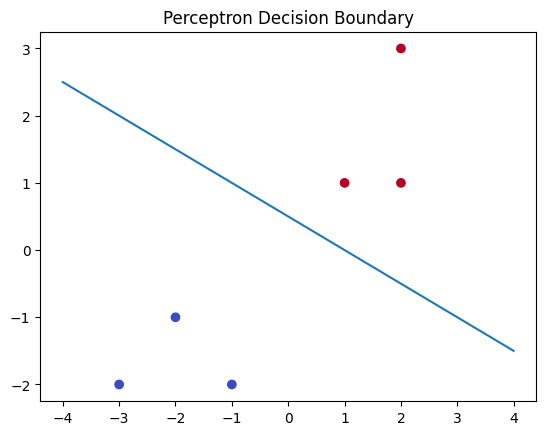

In [6]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

    x1 = np.linspace(-4, 4, 100)
    x2 = -(model.w[0]*x1 + model.b)/model.w[1]

    plt.plot(x1, x2)
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, model)

## XOR Limitation Test
Perceptron fails on non-linearly separable data.

The XOR Limitation Test demonstrates a fundamental weakness of a single-layer perceptron: its inability to classify data that is not linearly separable.

In [7]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

model.fit(X_xor, y_xor)
print("XOR Predictions:", model.predict(X_xor))

XOR Predictions: [1 1 0 0]


## Conclusion
The perceptron successfully classifies linearly separable data but fails on non-linear datasets.